# Classification

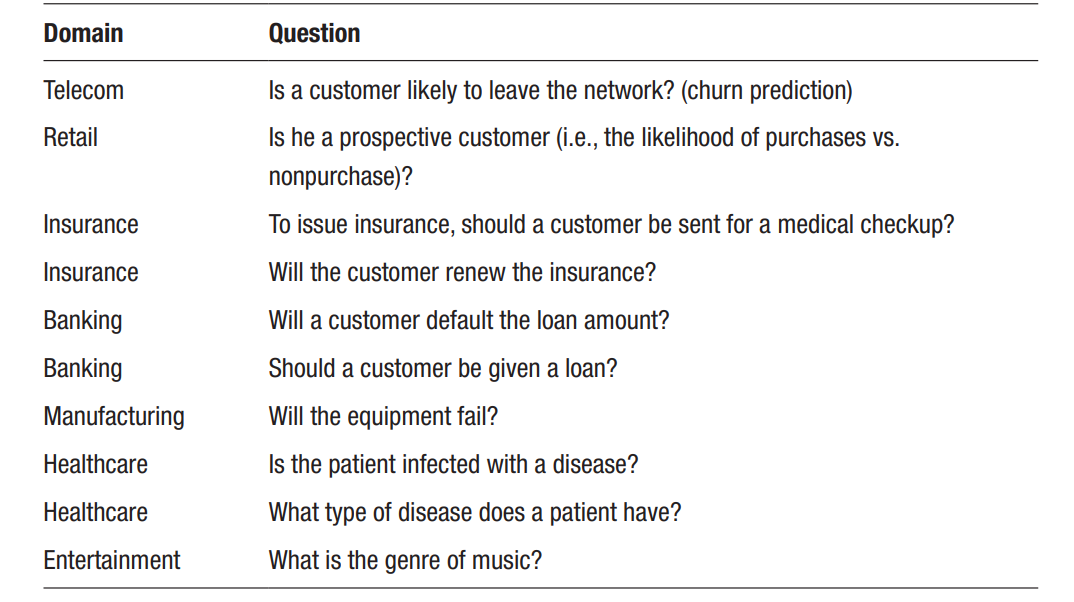

間單來說，classification 就是在計算一個新的物件，有可能是屬於哪一個類別。

## Logistic Regression

下面這個例子 ```1``` 代表通過，```0``` 代表沒通過

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # import 計算迴歸結果的套件

In [4]:
import sklearn.linear_model as lm

### 1. Load data

In [5]:
df = pd.read_csv(r"C:\Users\User\Machine_Learning\mastering-ml-w-python-in-six-steps-master\Chapter_3_Code\Code\Data\Grade_Set_1_Classification.csv")

In [6]:
df

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,1
6,8,1
7,9,1
8,10,1


### 2. Determine variables

In [7]:
x = df['Hours_Studied']
y = df['Result']

In [8]:
x.shape

(9,)

In [10]:
x = df['Hours_Studied'][:, np.newaxis] 

<ipython-input-10-fe95651e2ea8>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = df['Hours_Studied'][:, np.newaxis]


我們要將 ```x``` reshape 成 2D，因為 ```sklearn.linear_model``` 的 ```LinearRegression()``` 只接受 2D array  
注意!! ```np.newaxis``` 前面要有逗點 (```,```) !!!!!

In [11]:
x.shape

(9, 1)

In [12]:
lr = lm.LinearRegression()

### 3. Fit the model

In [13]:
lr.fit(x, y)

LinearRegression()

### 4. Plot the prediction 

Text(0, 0.5, 'Result')

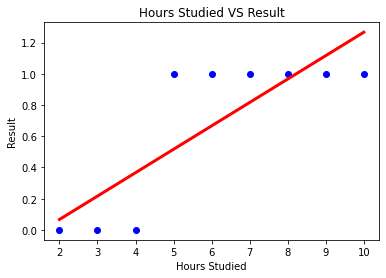

In [14]:
plt.scatter(x, y, color='blue')

plt.plot(x, lr.predict(x), color='red', linewidth=3)
plt.title("Hours Studied VS Result")
plt.xlabel("Hours Studied")
plt.ylabel("Result")

In [15]:
df['Result_Pred'] = lr.predict(x)

In [16]:
df

,Hours_Studied,Result,Result_Pred
0,2,0,0.066667
1,3,0,0.216667
2,4,0,0.366667
3,5,1,0.516667
4,6,1,0.666667
5,7,1,0.816667
6,8,1,0.966667
7,9,1,1.116667
8,10,1,1.266667


In [17]:
print ("R Squared : ", r2_score(df.Result, df.Result_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

R Squared :  0.675
Mean Absolute Error:  0.2296296296296296
Root Mean Squared Error:  0.26874192494328497


以下為書本內容:
- 從上面的資料發現，linear regression 並沒有辦法幫我們預測，這時候，可以考慮用 ```sigmoid``` 或是 ```logit``` function  
而這兩者都牽涉到 ```odds ratio``` (賠率比):  
$$ Odds\ Ratio = \frac{probability(y=1)}{1-probability(y=1)} $$  
就是指一件事情發生的機率相對於那件事情不發生的機率的比值。舉例，如果 y=1 (成功) 的機率是 80%，那賠率比就是 4:1，每五次有四次會成功。  
- 注意: Odds ratio 不是機率，機率的定義是 ratio of something happening / everything that could happen，但 odds ratio 的定義是 ration of something happening / something that is not happening.
  
- 而一個 ```logit``` 就是對 ```Odds Ratio``` 取 ```log``` (以 ```e``` 為底):  
$$ log(\frac{p}{1-p}) = mx+c $$  

What is going on?  
- Odds $\neq$ Odds Ratio  
- Odds 可以用數數的方式計算，也可以用機率 (recall Odds $\neq$ 機率!)的概念得出  
比如說我每玩八場只會贏五場，那 Odds 用數的就是 $\frac{5}{3}=1.7$ (i.e. 贏五場輸三場)。用機率的話，我贏的機率是 $\frac{5}{8}$，輸的機率是 $\frac{3}{8}$，因此 $Odds = \frac{\frac{5}{8}}{\frac{3}{8}} = 1.7$  
---
What is the problem of Odds?  
  如果今天考慮贏對輸的賠率 (i.e. p = the probability of winning)，那 Odds 即為 $\frac{p}{1-p}$。  
以下用數數的方式想，我的勝率很低，代表我可能輸 50 場才會贏一場，此時 Odds = $\frac{1}{50} = 0.02$。如果我輸 100 場才贏一場，那 Odds 就會是 $\frac{1}{100} = 0.01$。因此，<font color='red'>勝率越低，Odds 會朝 0 的方向移動 (但不會到 0，因為沒有"輸幾次之後贏 0 次"這種說法) </font>  
  相反的，如果今天勝率很高，代表可能我輸一場後，就會贏 3 場，那 Odds 就會是 $\frac{3}{1} = 3$。如果輸一場後會贏 10 場，那 Odds 就是 $\frac{10}{1} = 10$。因此理論上，<font color='red'>勝率夠高，Odds 會往無限大的方向移動。</font>
---
So how to deal with this?  
Take the log()! (See picture below) -> We make it 對稱  
因此，取 log 可以解決這種不對稱的問題。進一步，把 log 套用在機率的概念 (i.e. $log(Odds) = log(\frac{p}{1-p})$)，此時的 $log(\frac{p}{1-p})$ 就稱為 <font color='red'> logit function </font>。  
---
套用 logit function，後 log(odds) 將是一個 normal distribution。 (請看第 3 張圖)

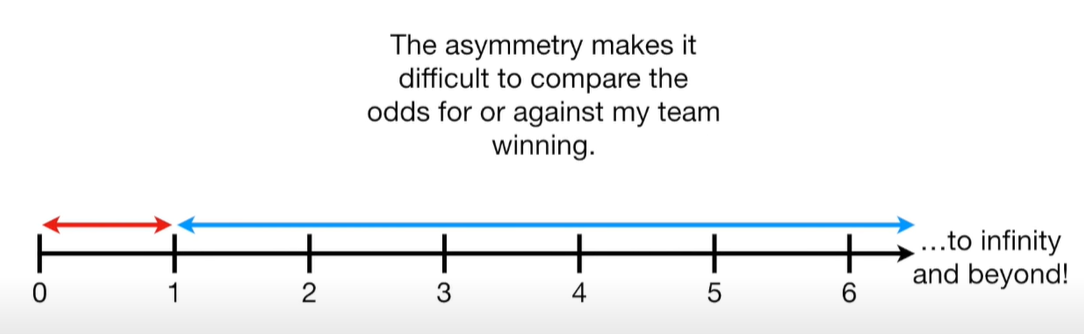

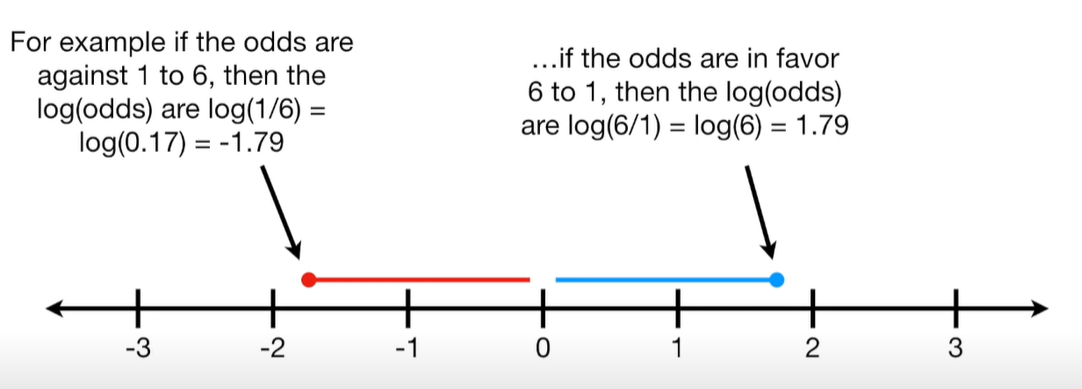

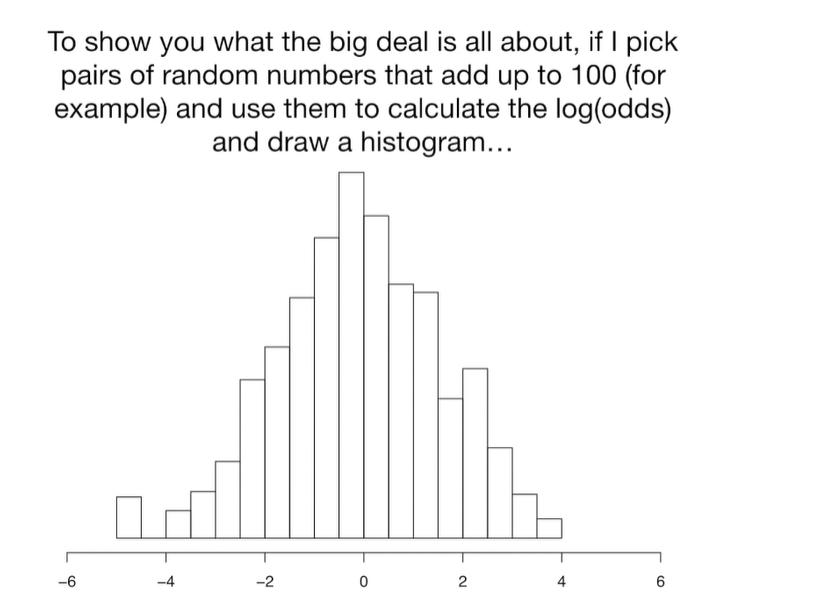

Odds Raio: 

What is the difference between Odds and Odds Ratio?  
ANS: Odds Ratio 就是兩個 Odds 的比例。舉例來說，考慮下面的矩陣:  
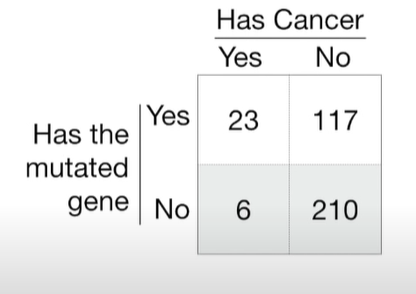

其中，row 的 yes 跟 no 指的是樣本是否有某個基因。現在我們想知道，有這個基因的人，得到癌症的賠率 相對於 沒有這個基因的人，得到癌症的賠率:   
$\frac{\frac{23}{117}}{\frac{6}{210}} = 6.88$。如果我們對這個 odds ratio 取 log，會是 $\log{6.88} = 1.93$  
---
6.88 的意思是說: 有這個基因的人，他得到癌症的賠率相對沒有此基因的人得到癌症的賠率。注意到 Odds ratio 就像是 R-Square，因為 Odds Ratio 越高，這個基因就越可以解釋癌症。